In [26]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(f"IMDB Dataset.csv")

In [28]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [30]:
df.shape

(50000, 2)

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [33]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### One Hot Encounter

In [34]:


df['sentiment']=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

## Train and test split

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)

In [39]:
train_data.shape

(40000, 2)

In [40]:

test_data.shape

(10000, 2)

In [41]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

In [42]:
X_train_seq=pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=300)
X_test_seq=pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=300)

In [43]:
X_train_seq

array([[  81, 3155,  195, ...,  205,  351, 3856],
       [   0,    0,    0, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]])

In [44]:
X_test_seq

array([[   0,    0,    0, ...,  995,  719,  155],
       [ 107,  278, 3048, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]])

In [45]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

In [46]:
y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [47]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

In [48]:
model=Sequential()
model.add(Embedding(input_dim=5000,output_dim=128,input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_seq, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 238s 466ms/step - accuracy: 0.7342 - loss: 0.5152 - val_accuracy: 0.7343 - val_loss: 0.5218
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 395ms/step - accuracy: 0.8310 - loss: 0.3890 - val_accuracy: 0.8026 - val_loss: 0.4289
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 182s 364ms/step - accuracy: 0.8755 - loss: 0.3029 - val_accuracy: 0.8699 - val_loss: 0.3176
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 188s 375ms/step - accuracy: 0.8748 - loss: 0.3039 - val_accuracy: 0.8621 - val_loss: 0.3415
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 498s 998ms/step - accuracy: 0.8844 - loss: 0.2857 - val_accuracy: 0.8543 - val_loss: 0.3617
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 291ms/step - accuracy: 0.9068 - loss: 0.2368 - val_accuracy: 0.8593 - val_loss: 0.3449
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 148s 296ms/step - accuracy: 0.9160 - loss: 0.2158 - val_accuracy: 0.8760 - val_loss: 0.3341
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 303ms/step - accuracy: 0.9194 -

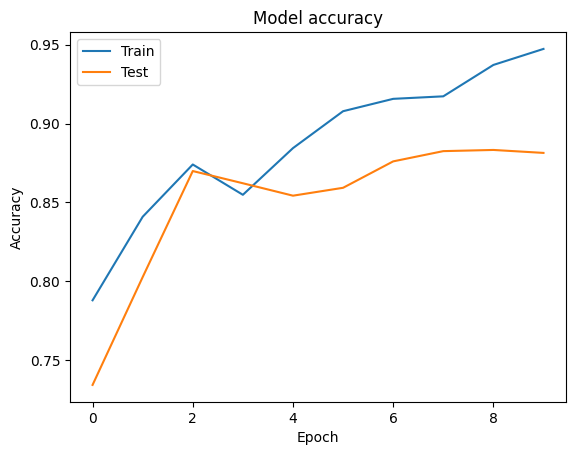

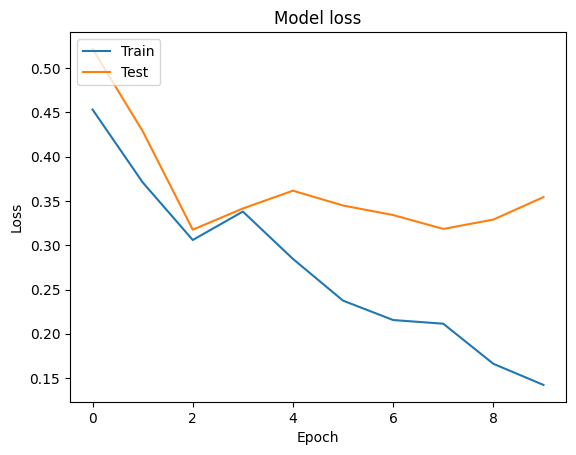

In [50]:
# prompt: make a graph for model

import matplotlib.pyplot as plt

# Assuming 'history' object contains the training history from model.fit
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [51]:

model.save("model.h5")

In [ ]:
import joblib
joblib.dump(tokenizer,"tokenizer.pkl")

['tokenizer.pkl']

In [53]:
loss,accuracy = model.evaluate(X_test_seq,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.8814 - loss: 0.3323


In [54]:
print(loss)

0.3281586766242981


In [55]:
print(accuracy)

0.8859000205993652


In [56]:
# Build Predictive analysis

def predict_sentiment(review):
  review = review.lower()
  sequene=tokenizer.texts_to_sequences([review])
  padded_sequence=pad_sequences(sequene,maxlen=300)
  prediction=model.predict(padded_sequence)
  sentiment="positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment, prediction
   

predict_sentiment("A visual masterpiece")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


('positive', array([[0.9255024]], dtype=float32))

In [62]:
test_sentences = ["The movie was good", "The movie was bad", "I loved the film", "I hated the movie"]
for sentence in test_sentences:
    print(f"Review: {sentence} -> Prediction: {predict_sentiment(sentence)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Review: The movie was good -> Prediction: ('positive', array([[0.7050067]], dtype=float32))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Review: The movie was bad -> Prediction: ('negative', array([[0.22791901]], dtype=float32))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Review: I loved the film -> Prediction: ('positive', array([[0.98787296]], dtype=float32))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Review: I hated the movie -> Prediction: ('negative', array([[0.11627014]], dtype=float32))


In [57]:
predict_sentiment("Overall long and slow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


('negative', array([[0.4895439]], dtype=float32))

In [58]:
predict_sentiment("A trilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


('positive', array([[0.9881241]], dtype=float32))

In [59]:
predict_sentiment("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


('positive', array([[0.9908338]], dtype=float32))